In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [173]:
file = 'https://raw.githubusercontent.com/zero1ale/Practicas/master/Video_Games_Sales_as_at_22_Dec_2016.csv'
data = pd.read_csv(file)
data=data[~(data.Rating.isnull())]
data=data[((data.Rating=='E')|(data.Rating=='M'))]
data.reset_index(inplace=True,drop=True)
# arreglo
dataset = data.values

In [174]:
data.isnull().values.any()

True

In [175]:
X = dataset[:, :-2]
y = dataset[:,-1]

In [176]:
X = X.astype(str)

In [179]:
data.Rating.unique()

array(['E', 'M'], dtype=object)

In [218]:
def load_dataset(filename):
    # Cargamos el Dataframe
    data = pd.read_csv(file)
    data = data[['Platform','Year_of_Release','Genre','User_Score','Rating']]
    data=data[~(data.Rating.isnull())]
    data=data[((data.Rating=='E')|(data.Rating=='M'))]
    data.reset_index(inplace=True,drop=True)
    dataset = data.values
    # Dividimos en X y y
    X = dataset[:, :-2]
    y = dataset[:,-1]
    # Forzamos que X sea string 
    X = X.astype(str)
    return X, y

In [207]:
load_dataset(file)

(array([['Wii', '2006.0', 'Sports', 'Nintendo'],
        ['Wii', '2008.0', 'Racing', 'Nintendo'],
        ['Wii', '2009.0', 'Sports', 'Nintendo'],
        ...,
        ['GC', '2003.0', 'Puzzle', 'Ubisoft'],
        ['DS', '2008.0', 'Puzzle', 'Majesco Entertainment'],
        ['DS', '2008.0', 'Simulation', 'Destineer']], dtype='<U38'),
 array(['E', 'E', 'E', ..., 'E', 'E', 'E'], dtype=object))

In [219]:
# Cargamos el dataset
X, y = load_dataset(file)

# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Checamos las dimensiones
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3721, 3) (3721,)
Test (1833, 3) (1833,)


In [220]:
X

array([['Wii', '2006.0', 'Sports'],
       ['Wii', '2008.0', 'Racing'],
       ['Wii', '2009.0', 'Sports'],
       ...,
       ['GC', '2003.0', 'Puzzle'],
       ['DS', '2008.0', 'Puzzle'],
       ['DS', '2008.0', 'Simulation']], dtype='<U12')

In [221]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [222]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [227]:
# Preparamos los datos de entrada o características
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Preparamos los datos de salida o target
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [228]:
#chi-squared

In [229]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [230]:
# Selección de características con chi-squared
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 634.714188
Característica 1: 228.774131
Característica 2: 490.102256


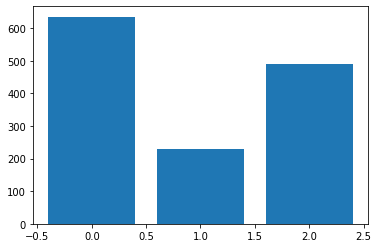

In [231]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [232]:
#Selección de características de información mutua (Mutual Information)

In [233]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [234]:
# Selección de características con mutual information
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 0.144325
Característica 1: 0.039297
Característica 2: 0.307789


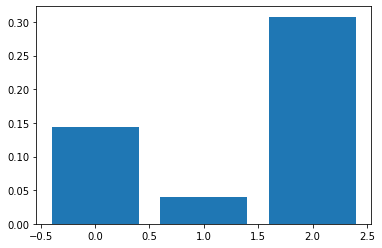

In [235]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()